In [15]:
import networkx as nx

In [16]:
# multiple ways of creating graphs
G = nx.DiGraph()
G = nx.DiGraph([(1,2),(2,3)])
E = nx.DiGraph(G)

In [17]:
# multiple ways of adding nodes to graphs
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from([(4, {"color": "red"})])

In [18]:
# add another graph as a node
H = nx.path_graph(3)
G.add_node(H)

In [19]:
# multiple ways of adding edges to graphs
G.add_edge(1,2)

new_edge = (1,3)
G.add_edge(*new_edge)

# ebunch of edges: any iterable container of edge-tuples
#   edge-tuples: 2 tuple of nodes or 3 tuples (2 nodes and 1 attr)
new_edges = [(1,4),(1,5)]
G.add_edges_from(new_edges)

In [20]:
# edges can also have properties
G.add_edge(1,2, weight= 3)

new_edge = (1,3)
G.add_edge(*new_edge, weight = 4)

new_edges = [(1,4, {'weight': 5}),(1,5, {'weight': 6})]
G.add_edges_from(new_edges)

In [21]:
# methods to access graph components
G.number_of_nodes()

6

In [22]:
G.number_of_edges()

5

In [23]:
list(G.nodes)

[1, 2, 3, 4, <networkx.classes.graph.Graph at 0x7f18a5a68990>, 5]

In [24]:
list(G.edges)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3)]

In [25]:
list(G.adj[1]) #neighbors of 1

[2, 3, 4, 5]

In [26]:
list(G.neighbors(1))

[2, 3, 4, 5]

In [27]:
G.degree[1]

4

In [32]:
#nbunch 
#   None: all nodes
print(G.edges(None)) # all nodes

#   1 node
print(G.edges([1])) #nbunch of 1

#   iterable container of nodes
print(G.edges([1,2,3]))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3)]
[(1, 2), (1, 3), (1, 4), (1, 5)]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3)]


In [39]:
G.add_node("zip")
G.add_nodes_from("zip")
list(G)

[1,
 2,
 3,
 4,
 5,
 'zip',
 'z',
 'i',
 'p']

In [40]:
# removing nodes
G.remove_node("zip")
G.remove_nodes_from("zip")
list(G)

[1, 2, 3, 4, <networkx.classes.graph.Graph at 0x7f18a5a68990>, 5]

In [50]:
#nodes and edges can be anything, handing the choice to the user
class Foo:
    def __init__(self, str, int):
        self.str = str
        self.int = int
        
class Bar:
    def __init__(self, weight):
        self.weight = weight        

G = nx.DiGraph()
nodes = [(Foo("bar", 1), Foo("bar", 2))]
G.add_nodes_from(nodes)
G.add_edge(Foo("bar", 1), Foo("bar", 2), object=Bar(3))

In [51]:
list(G.edges)

[(<__main__.Foo at 0x7f18a7105cd0>, <__main__.Foo at 0x7f18a5a14510>)]

In [54]:
G = nx.DiGraph()
G.add_edge(1,3)
G[1][3]["color"] = "blue"
G.edges[1,3]

{'color': 'blue'}

In [55]:
G.adj.items()

ItemsView(AdjacencyView({1: {3: {'color': 'blue'}}, 3: {}}))

In [58]:
for n, nbrs in G.adj.items():
    print(nbrs)

{3: {'color': 'blue'}}
{}


In [64]:
# adding attributes to graph, nodes, edges
# networkx uses variadict syntax for attributes, associating them with
# hashtable keys that can be indexed

# GRAPHs
G = nx.Graph(day="Friday")
G.graph['weight'] = 5

In [69]:
# NODES
nodes = [
    (1, {"name": "A"}),
    (2, {"name": "B"}),
]
G.add_nodes_from(nodes)

G.add_node(3, name="C")

G.nodes.data()

NodeDataView({3: {'name': 'C'}, 1: {'name': 'A'}, 2: {'name': 'B'}})

In [72]:
# EDGES
G.add_edge(1,2, weight=15)
G.add_edges_from([(1,3,{"weight": 13})])
G[1][2]["color"] = "pink"
G.edges.data()

EdgeDataView([(3, 1, {'weight': 13}), (1, 2, {'weight': 15, 'color': 'pink'})])

In [122]:
import numpy as np

x = np.random.choice(20, size=10, replace=False)
y = np.random.choice(20, size=10, replace=False)

pos = [(a,b) for a,b in zip(x,y)]


In [123]:
# Djikstra algorithm

D = nx.Graph()
nodes = [(i, {"pos": pos[i]}) for i in range(10)]
D.add_nodes_from(nodes)

weight = "weight"

edges = [
    (0,1, {weight: 3}),
    (0,2, {weight: 4}),
    (0,4, {weight: 1}),
    (1,3, {weight: 4}),
    (1,9, {weight: 7}),
    (2,3, {weight: 6}),
    (2,4, {weight: 2}),
    (2,6, {weight: 3}),
    (3,5, {weight: 5}),
    (3,9, {weight: 1}),
    (4,7, {weight: 2}),
    (4,8, {weight: 7}),
    (4,9, {weight: 6}),
    (5,9, {weight: 3}),
    (6,8, {weight: 4}),
    (7,9, {weight: 5}),
    (8,9, {weight: 1}),
]
D.add_edges_from(edges)

nx.shortest_path(D, source=0, target=9, weight=weight, method='dijkstra')


[0, 4, 9]

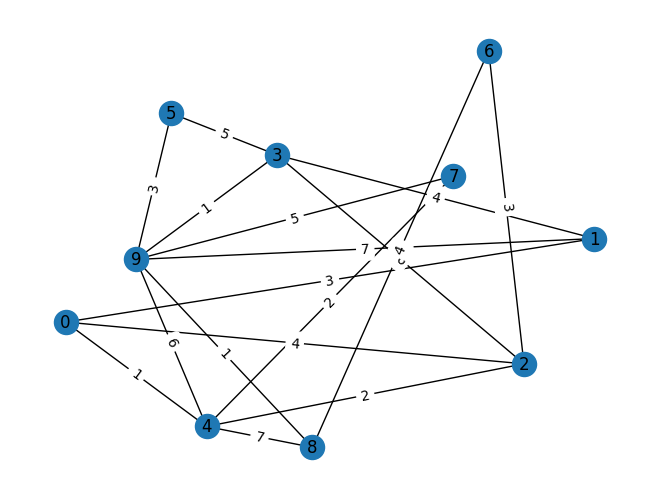

In [124]:
# plotting
import matplotlib.pyplot as plt
pos = nx.get_node_attributes(D, 'pos')
nx.draw(D,pos, with_labels=True)
edge_labels = nx.get_edge_attributes(D, 'weight')
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()